<a href="https://colab.research.google.com/github/jiawen528/Application-Packet/blob/main/%E3%80%8CML_ch02_20240930_1st_exam_question_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 2 – End-to-end Machine Learning project**

This is the first machine learning test. It consists of six question. Q1 to Q4 each worth 15 points, and Q5 and Q6 worth 20 points each. We will use the house price prediction dataset from Hands-On Machine Learning

In [ ]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

1. In the following question, we focus on the new DataFrame with features: housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, and ocean_proximity. Display the top three instances of the new DataFrame, considering only these features. Name the new DataFrame "new_data_pd".

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

new_data_pd = housing[["housing_median_age", "total_rooms", "total_bedrooms",
                       "population", "households", "median_income",
                       "median_house_value", "ocean_proximity"]]

print(new_data_pd.head(3))

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   

   median_income  median_house_value ocean_proximity  
0         8.3252            452600.0        NEAR BAY  
1         8.3014            358500.0        NEAR BAY  
2         7.2574            352100.0        NEAR BAY  


2. Plot a scatter diagram between median_house_value and housing_median_age.

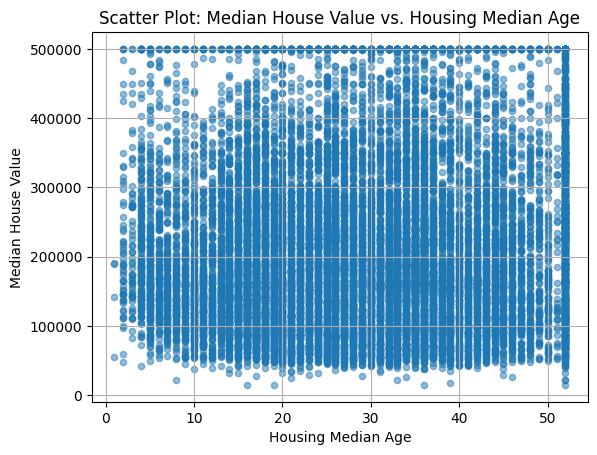

In [ ]:
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="housing_median_age", y="median_house_value", alpha=0.5)
plt.title("Scatter Plot: Median House Value vs. Housing Median Age")
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.grid(True)
plt.show()

3.  Display a histogram of median_house_value with three bins.

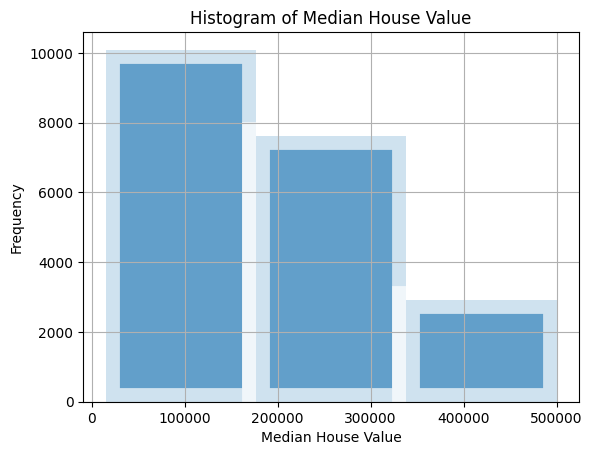

In [ ]:
housing["median_house_value"].plot(kind="hist", bins=3, alpha=0.7, edgecolor='white', linewidth=20)
plt.title("Histogram of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

4. Create a new feature called remaining, which is calculated by subtracting total_bedrooms from total_rooms.

In [ ]:
housing["remaining"] = housing["total_rooms"] - housing["total_bedrooms"]

print(housing[["total_rooms", "total_bedrooms", "remaining"]].head())

   total_rooms  total_bedrooms  remaining
0        880.0           129.0      751.0
1       7099.0          1106.0     5993.0
2       1467.0           190.0     1277.0
3       1274.0           235.0     1039.0
4       1627.0           280.0     1347.0


5. The label we are predicting is median_income, referred to as y_label. The remaining features, used to predict median_income, are called x_features. Display both y_label and x_features

In [ ]:
y_label = housing["median_income"]

x_features = housing.drop(columns=["median_income"])

print("y_label (median_income):")
print(y_label.head())

print("\nx_features (remaining features):")
print(x_features.head())

y_label (median_income):
0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

x_features (remaining features):
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_house_value ocean_proximity  remaining  
0       322.0       126.0            452600.0        NEAR BAY      751.0  
1      2401.0      1138.0            358500.0        NEAR BAY     5993.0  
2       496.0       177.0            352100.0        NEAR BAY     1277.0  
3       558.0       219.0            341300.0        NEAR BAY     1039.0  
4       565.0      

6. Select the top 100 instances from new_data_pd as the training set and the last 20 instances as the test set. Name the training set with y_label as train_y and the test set as test_y. Name the training set with x_features as train_features and the test set as test_features. Display all the four sets and their their shape.

In [ ]:
new_data_pd = housing[["housing_median_age", "total_rooms", "total_bedrooms",
                       "population", "households", "median_income",
                       "median_house_value", "ocean_proximity"]]

y_label = new_data_pd["median_income"]
x_features = new_data_pd.drop(columns=["median_income"])

train_y = y_label.iloc[:100]
test_y = y_label.iloc[-20:]
train_features = x_features.iloc[:100]
test_features = x_features.iloc[-20:]

print("\nTrain Features (train_features):")
print(train_features)
print("Shape of train_features:", train_features.shape)

print("\nTest Features (test_features):")
print(test_features)
print("Shape of test_features:", test_features.shape)

print("Train Y (train_y):")
print(train_y)
print("Shape of train_y:", train_y.shape)

print("\nTest Y (test_y):")
print(test_y)
print("Shape of test_y:", test_y.shape)


Train Features (train_features):
    housing_median_age  total_rooms  total_bedrooms  population  households  \
0                 41.0        880.0           129.0       322.0       126.0   
1                 21.0       7099.0          1106.0      2401.0      1138.0   
2                 52.0       1467.0           190.0       496.0       177.0   
3                 52.0       1274.0           235.0       558.0       219.0   
4                 52.0       1627.0           280.0       565.0       259.0   
..                 ...          ...             ...         ...         ...   
95                36.0       5329.0          2477.0      3469.0      2323.0   
96                31.0       4596.0          1331.0      2048.0      1180.0   
97                29.0        335.0           107.0       202.0        91.0   
98                22.0       3682.0          1270.0      2024.0      1250.0   
99                37.0       3633.0          1085.0      1838.0       980.0   

    median_house_